#Trabajo Computacional no. 01 de Redes Complejas
#Marco A. Villagran Azuara

In [18]:
import numpy as np
import math as ma
import networkx as nx
import powerlaw
from matplotlib import pyplot as plt

Problema No. 2

In [19]:
#Abre el primer conjunto de datos guarda el original y una copia, la copia es la que modificare
data_dolphins = nx.read_gml('dolphins.gml')
dd = data_dolphins
#Abre la info del genero de los delfines
archivo2=open('dolphinsGender.txt','r').readlines()

In [20]:
#Arreglos limpios para llenar con la informacion extra para los nodos

nombres = []
generos = []
gender_dict = {}
numeros = {}
colores = []
machos = 0
hembras = 0
incognita = 0

In [21]:
#Agrega info a los arreglos ya creados, incluido el mapa de color para los nodos que sigue al genero de los delfines

k = 0
for i in archivo2:
    j=i.split("\t")
    gender_dict[j[0]] = j[1].rstrip()
    if gender_dict[j[0]] == 'f':
      colores.append('orange')
      hembras = hembras + 1
    if gender_dict[j[0]] == 'm':
      colores.append('green')
      machos = machos + 1
    if gender_dict[j[0]] == 'NA':
      colores.append('black')
      incognita = incognita + 1
    numeros[j[0]] = k
    nombres.append(j[0])
    k = k+1

In [22]:
#Agrega atributos a los nodos de la red

nx.set_node_attributes(dd, gender_dict, 'gender')
nx.set_node_attributes(dd, numeros, 'id')

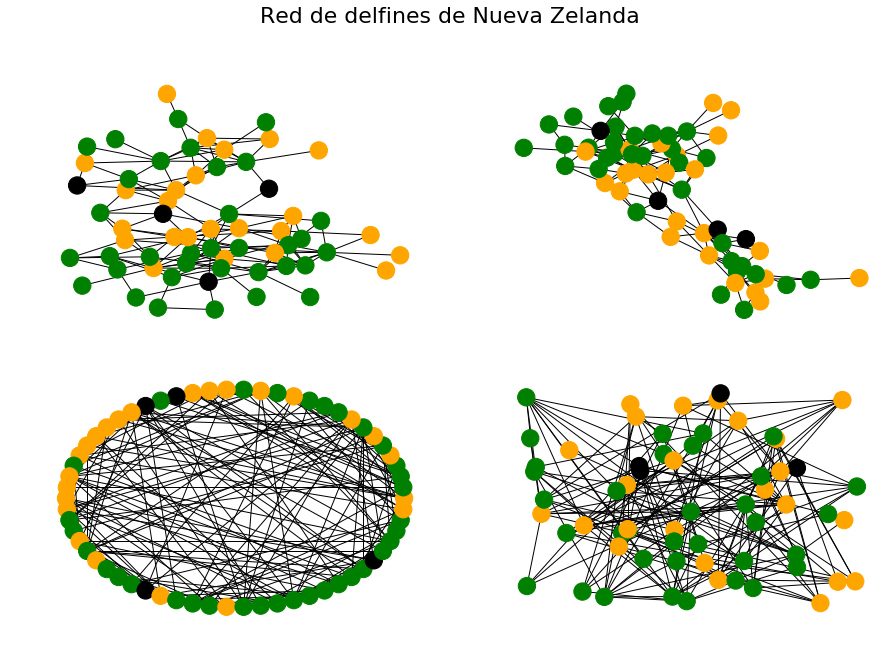

In [23]:
#Plotting

fig = plt.figure(figsize=(15,10))
plt.suptitle('Red de delfines de Nueva Zelanda', fontsize=22)
plt.subplot(2, 2, 1)
nx.draw_kamada_kawai(dd, node_color = colores)
plt.subplot(2, 2, 2)
nx.draw_spring(dd, node_color = colores)
plt.subplot(2, 2, 3)
nx.draw_shell(dd, node_color = colores)
plt.subplot(2, 2, 4)
nx.draw_random(dd, node_color = colores)
#plt.savefig('maps.png', dpi=300)
plt.show()

In [24]:
#Aqui es para contar el numero de enlaces entre delfines de generos iguales

sexo = nx.get_node_attributes(dd, 'gender')
ndd = nx.to_numpy_matrix(dd)
nexos = 0
for i in range(0,62):
    for j in range(0,62):
        if ndd[i,j] == 1:
            if sexo[nombres[i]] == sexo[nombres[j]]: 
                ndd[i,j] = ndd[i,j] * 2
                nexos = nexos + 1

In [25]:
#Creo arreglos con copia de la lista de sexos y de grados de los nodos

grado = []
clase = []
for i in range(0,62):
    grado.append(dd.degree[nombres[i]])
    clase.append(sexo[nombres[i]])

In [26]:
#Aqui es para mirar las cantidades esas que van pesadas con el grado, el algoritmo cuenta dos veces es decir cuenta AB y BA, por eso al final se divide por 2

num_m = 0.0
num_f = 0.0
num_na = 0.0

for i in range(0,np.size(grado)):
  for j in range(0,np.size(grado)):
    if i != j:
      if clase[i] == clase[j]:
        if clase[i] == 'm':
          num_m = num_m + ((grado[i] * grado[j])/(dd.number_of_edges() + 0.0))    
        if clase[i] == 'f':
          num_f = num_f + ((grado[i] * grado[j])/(dd.number_of_edges() + 0.0)) 
        if clase[i] == 'NA':
          num_na = num_na + ((grado[i] * grado[j])/(dd.number_of_edges() + 0.0)) 

num_m = num_m / 2
num_f = num_f / 2
num_na = num_na / 2

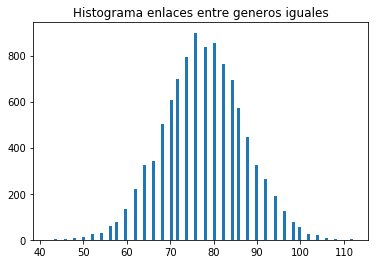

In [27]:
#La funcion de np.random.shuffle(arreglo) modifica el arreclo mezclando los valores que tiene. Esto no nos cambia el numero de edges ni la fraccion de nodos de cada genero

distro_generos = np.zeros(10000)

for k in range(0,10000):
  np.random.shuffle(clase)
  for i in range(0,62):
    for j in range(0,62):
      if ndd[i,j] == 1:
        if clase[i] == clase[j]: 
          distro_generos[k] = distro_generos[k] + 1

plt.close()
plt.hist(distro_generos,bins=100)
plt.title('Histograma enlaces entre generos iguales')
#plt.savefig('histograma_null_delfines.png',dpi=300)
plt.show()

In [28]:
#Algunas cantidades utiles

media = np.mean(distro_generos)
des_std = np.std(distro_generos)

#Para calcular el total del area bajo el histograma, lo bueno sera normalizar est area a 1
values, bines = np.histogram(distro_generos,bins=100)
area = sum(np.diff(bines)*values)

#Para el calculo del area despues de el numero de nexos original, da 0.1999 cuando se normaliza a 1
values_nexos = []
bines_nexos = []

for i in range(0,101):
  if bines[i] >= nexos/2:
    bines_nexos.append(bines[i])
    values_nexos.append(values[i-1])

values_nexos.remove(values_nexos[0])
new_area = sum(np.diff(bines_nexos)*values_nexos)

p_value = new_area/area

#Para el calculo del area despues de el numero de nexos original, da 0.1999 cuando se normaliza a 1
values_nexos = []
bines_nexos = []

for i in range(0,101):
  if bines[i] >= np.mean(distro_generos):
    bines_nexos.append(bines[i])
    values_nexos.append(values[i-1])

values_nexos.remove(values_nexos[0])
new_area = sum(np.diff(bines_nexos)*values_nexos)

p_value_mean = new_area/area

Problema No. 3

In [29]:
#Para esta seccion utilizo el trabajo de Alstott et al. (2014) DOI: http://www.plosone.org/article/info%3Adoi%2F10.1371%2Fjournal.pone.0085777
#Lectura de datos

In [30]:
data_internet = nx.read_gml('DATA/as-22july06.gml')
a = list(data_internet)

In [31]:
#Para obtener la distribucion de grados de los nodos
amount = nx.Graph.order(data_internet)

grado = np.zeros(amount)
    
for i in range(0,amount):
  grado[i] = data_internet.degree[a[i]]

In [32]:
#Generando histogramas en logaritmo y en lineal
datos_log, bines_log = np.histogram(grado,bins=np.logspace(np.log10(np.min(grado)),np.log10(np.max(grado)),15))
datos_lin, bines_lin = np.histogram(grado,bins=np.linspace(np.log10(np.min(grado)),np.log10(np.max(grado)),15))

In [33]:
#Ajuste a ley de potencias, vease: https://github.com/jeffalstott/powerlaw
ajuste = powerlaw.Fit(grado,xmin=1.0)
print(ajuste.power_law.alpha)
print(ajuste.power_law.xmin)
R, p = ajuste.distribution_compare('power_law', 'lognormal')

#El alpha de la ley de potencias esta dado por ajuste.power_law.alpha

/home/marco/anaconda2/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.4351717529396106
1.0


/home/marco/anaconda2/lib/python2.7/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


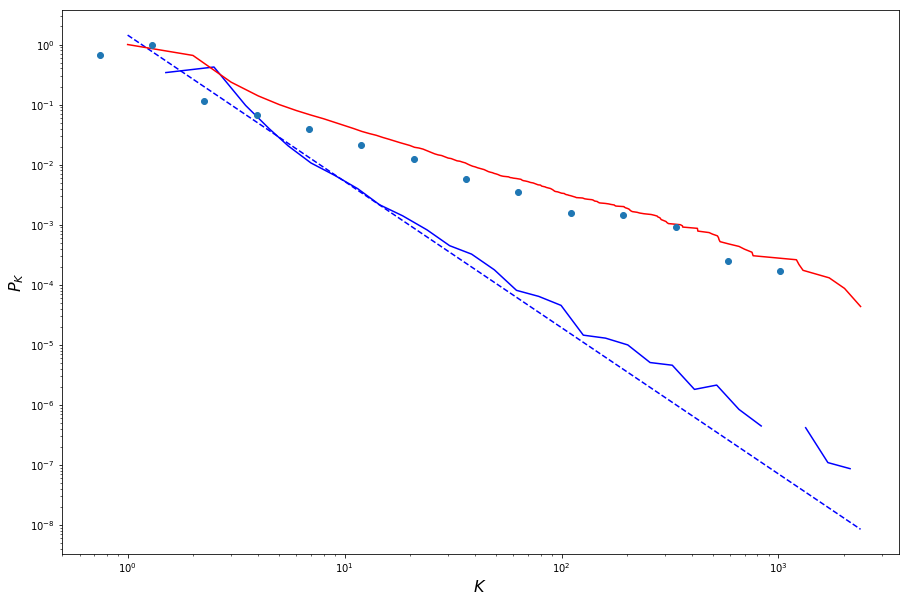

In [38]:
fig = plt.figure(figsize=(15,10))
powerlaw.plot_pdf(grado, color='b')
ajuste.power_law.plot_pdf(color='b', linestyle='--')
powerlaw.plot_ccdf(grado, color='r')
A = np.diff(bines_log)
ydata = np.divide(datos_log + 0.0,np.amax(datos_log))
plt.loglog(np.diff(bines_log),ydata,'o')
plt.xlabel(r'$K$', size=16)
plt.ylabel(r'$P_K$', size=16)
plt.show()